# ECBM E4040 - Assignment 2- Task 5: Kaggle Open-ended Competition

Kaggle is a platform for predictive modelling and analytics competitions in which companies and researchers post data and statisticians and data miners compete to produce the best models for predicting and describing the data.

If you don't have a Kaggle account, feel free to join at [www.kaggle.com](https://www.kaggle.com). To let the CAs do the grading more conveniently, please __use Lionmail to join Kaggle__ and __use UNI as your username__.

The website for this competition is: 
https://www.kaggle.com/c/e4040fall2019-assignment-2-task-5

You can find detailed description about this in-class competition on the website above. Please read carefully and follow the instructions.

<span style="color:red">__TODO__:</span>
1. Train a custom model for the bottle dataset classification problem. You are free to use any methods taught in the class or found by yourself on the Internet (ALWAYS provide reference to the source) but __TF 2.0 is not allowed to use in this competition__. General training methods include:
    * Dropout
    * Batch normalization
    * Early stopping
    * l1-norm & l2-norm penalization
2. You'll be given the test set to generate your predictions (70% public + 30% private, but you don't know which ones are public/private). Achieve 70% accuracy on the public test set. The accuracy will be shown on the public leaderboard once you submit your prediction .csv file. The private leaderboard would be released after the competition. The final ranking would based on that result, not the public one.
3. 

    * Report your results on the Kaggle, for comparison with other students' optimal results (you can do this several times). 
    * Save your best model, using Github Classroom, at the same time when you submit the homework files into Courseworks. See instructions below. 

__Hint__: You can start from what you implemented in task 4. Another classic classification model named 'VGG16' can also be easily implemented.

## HW Submission Details:
There are three components to reporting the results of this task: 

**(A) Submission (up to 20 submissions each day) of the .csv prediction file throught the Kaggle platform;**. You should start doing this __VERY early__, so that students can compare their work as they are making progress with model optimization.

**(B) Editing and submitting the content of this Jupyter notebook, through Courseworks; **
(i) The code for your CNN model and for the training function. The code should be stored in __./ecbm4040/neuralnets/kaggle.py__;
(ii) Print out your training process and accuracy __within this notebook__;

**(C) Submitting your best CNN model through Github Classroom repo.**

**Description of (C):** 
For this task, we will continue to use Github classroom to save your model for submission. 

<span style="color:red">__Submission content:__ :</span>
(i) In your Assignment 2 submission folder, create a subfolder called __KaggleModel__. Upload your best model with all the data output (for example, __MODEL.data-00000-of-00001, MODEL.meta, MODEL.index__) into the folder. 
(ii) Remember to delete any intermediate results, **we only want your best model. Do not upload any data files**. The instructors will rerun the uploaded best model and verify against the score which you reported on the Kaggle.



## Train your model here

In [0]:
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
!unzip "/content/gdrive/My Drive/e4040fall2019-assignment-2-task-5.zip" -d data

Archive:  /content/gdrive/My Drive/e4040fall2019-assignment-2-task-5.zip
  inflating: data/kaggle_test_128/test_128/0.png  
  inflating: data/kaggle_test_128/test_128/1.png  
  inflating: data/kaggle_test_128/test_128/10.png  
  inflating: data/kaggle_test_128/test_128/100.png  
  inflating: data/kaggle_test_128/test_128/1000.png  
  inflating: data/kaggle_test_128/test_128/1001.png  
  inflating: data/kaggle_test_128/test_128/1002.png  
  inflating: data/kaggle_test_128/test_128/1003.png  
  inflating: data/kaggle_test_128/test_128/1004.png  
  inflating: data/kaggle_test_128/test_128/1005.png  
  inflating: data/kaggle_test_128/test_128/1006.png  
  inflating: data/kaggle_test_128/test_128/1007.png  
  inflating: data/kaggle_test_128/test_128/1008.png  
  inflating: data/kaggle_test_128/test_128/1009.png  
  inflating: data/kaggle_test_128/test_128/101.png  
  inflating: data/kaggle_test_128/test_128/1010.png  
  inflating: data/kaggle_test_128/test_128/1011.png  
  inflating: data/k

In [35]:
import cv2
from os import listdir
from matplotlib import image
import numpy as np
from scipy import ndimage, misc

# load all images in a directory
loaded_images = list()
loaded_y = list()
X_test = list()
img_size =128
for folder in listdir('data/kaggle_train_128/train_128/'):
    clas = ('data/kaggle_train_128/train_128/'+ folder+'/')
    value = int(folder)
    print("Loading Data of Class {}".format(value))
    for filename in listdir(clas):
        img_data = cv2.resize(image.imread(clas + filename), (img_size, img_size),interpolation = cv2.INTER_AREA)
        #img_data = misc.imresize(img_data, (64, 64))
        loaded_images.append(img_data)
        loaded_y.append(value)
print("Data Loaded")
X_train=np.asarray(loaded_images)
y_train = np.asarray(loaded_y)
print(y_train[2990:3010])
print("shuffling..")
seq = np.arange(len(y_train))
np.random.shuffle(seq)
X_train, y_train = X_train[seq], y_train[seq]
print("shuffling done...")
print("All data Loaded..")

Loading Data of Class 4
Loading Data of Class 1
Loading Data of Class 0
Loading Data of Class 3
Loading Data of Class 2
Data Loaded
[4 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1 1]
shuffling..
shuffling done...
All data Loaded..


In [37]:
for filename in range(3500):
#for filename in listdir('data/kaggle_test_128/test_128/'):
        filename = str(filename)+".png"
        img_data = cv2.resize(image.imread('data/kaggle_test_128/test_128/' + filename), (img_size, img_size),interpolation = cv2.INTER_AREA)
        X_test.append(img_data)
X_test = np.asarray(X_test)
X_val, y_val = X_train[-500:-1] , y_train[-500:-1]
X_train, y_train = X_train[:-500] , y_train[:-500]
print("All data Loaded..")

All data Loaded..


In [0]:
data_train, data_val = X_train, X_val
import cv2

In [39]:
#print(y_val)
X_train, X_val = data_train, data_val
print(X_train.shape)

(14500, 128, 128, 3)


3
1
2
2
1
2
4
0
2
4
4
1
1
0
3
2


"\nax = fig.add_subplot(4,4,i+1)\nax.imshow(X_train1[i,:].reshape(128,128,3), 'rgb')\nax.axis('off')\n"

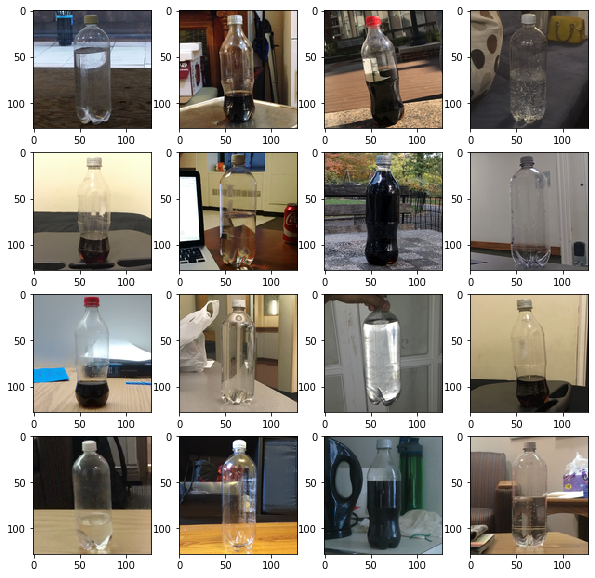

In [40]:
from matplotlib import pyplot as plt
from scipy.ndimage.interpolation import rotate
import matplotlib.image as mpimg
X_train, X_val = data_train, data_val
mean_image = np.mean(X_train, axis=0)
var_image = np.var(X_train, axis=0)
epsilon = 1e-5

"""
X_train -=  mean_image
X_val -=  mean_image
X_train = np.divide(X_train, np.sqrt(var_image+0.000001))
X_val = np.divide(X_val, np.sqrt(var_image+0.000001))
min_image = np.min(X_train, axis=0)
X_train += min_image
X_val += min_image
"""
fig = plt.figure(figsize=(10,10))

for i in range(16):
    ax = fig.add_subplot(4,4,i+1)
    ax.imshow(X_val[i])
    print(y_val[i])
"""
fig = plt.figure(figsize=(10,10))
for i in range(16):
    image = (X_train[i])
    plt.imshow(image)
    plt.show()
"""
"""
ax = fig.add_subplot(4,4,i+1)
ax.imshow(X_train1[i,:].reshape(128,128,3), 'rgb')
ax.axis('off')
"""

In [41]:

#from utils.image_generator import ImageGenerator
import tensorflow as tf
print(tf.__version__)

1.15.0


In [0]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization, Activation
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import VGG16
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_input2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical as one_hot

In [0]:
y_train_1hot = one_hot(y_train)
y_val_1hot = one_hot(y_val)

In [0]:
base_model=VGG16(include_top=False, weights='imagenet', input_shape=(128,128,3)) 
x=base_model.output

x=Flatten()(x)
x=Dense(256,activation='relu')(x)
x=BatchNormalization()(x)
x=Dense(1024,activation='relu')(x)
x=BatchNormalization()(x)
x=Dense(1024,activation='relu')(x)
x=BatchNormalization()(x)
"""
x=Dense(1024,activation='relu')(x)
x=BatchNormalization()(x)
x=Dense(1024,activation='relu')(x)
x=BatchNormalization()(x)
x=Dense(1024,activation='relu')(x)
x=BatchNormalization()(x)
"""
preds=Dense(5,activation='softmax')(x) 


In [0]:
model = Model(inputs=base_model.input, outputs =preds)

for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True


In [46]:
adam = Adam(lr=0.001) 
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0   

In [0]:
bs = 128
epc = 10
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input2) #included in our dependencies
train_generator = train_datagen.flow(X_train, y_train_1hot, batch_size=bs)
step_size_train=train_generator.n//train_generator.batch_size
#step_size = X_train.shape[0]//bs

In [48]:

his = model.fit_generator(generator = train_generator,
                   steps_per_epoch = step_size_train,
                   epochs = epc,
                   validation_data=(X_val, y_val_1hot))
"""
his = model.fit(x = X_train, y=y_train_1hot,
                   batch_size =bs,
                   epochs = epc,
                   validation_data=(X_val, y_val_1hot))
"""

Train on 14500 samples, validate on 499 samples
Epoch 1/10
14500/14500 [==============================] - 42s 3ms/sample - loss: 1.1446 - acc: 0.6096 - val_loss: 1.2157 - val_acc: 0.4890
Epoch 2/10
14500/14500 [==============================] - 42s 3ms/sample - loss: 0.5705 - acc: 0.7865 - val_loss: 0.8125 - val_acc: 0.7054
Epoch 3/10
14500/14500 [==============================] - 42s 3ms/sample - loss: 0.4029 - acc: 0.8531 - val_loss: 0.8503 - val_acc: 0.7074
Epoch 4/10
14500/14500 [==============================] - 42s 3ms/sample - loss: 0.2911 - acc: 0.8943 - val_loss: 0.8789 - val_acc: 0.7275
Epoch 5/10
14500/14500 [==============================] - 42s 3ms/sample - loss: 0.2246 - acc: 0.9202 - val_loss: 1.3634 - val_acc: 0.6974
Epoch 6/10
14500/14500 [==============================] - 42s 3ms/sample - loss: 0.1721 - acc: 0.9374 - val_loss: 1.1032 - val_acc: 0.7495
Epoch 7/10
14500/14500 [==============================] - 42s 3ms/sample - loss: 0.1498 - acc: 0.9479 - val_loss: 1.20

In [49]:
print(f'Baseline Accuracy: {model.evaluate(X_val, y_val_1hot)[1]}')

preds = model.predict(X_val)
print(preds)
preds = np.argmax(preds, axis=1)
print(y_val)
print(preds)

499/499 [==============================] - 2s 3ms/sample - loss: 1.3523 - acc: 0.7375
Baseline Accuracy: 0.7374749779701233
[[3.8898424e-06 3.5112269e-05 8.0283880e-06 9.8507500e-01 1.4878039e-02]
 [2.5821445e-09 9.9999928e-01 6.8812813e-07 6.0920041e-12 1.0244868e-08]
 [8.7847166e-06 5.5262745e-07 9.9998951e-01 1.6579376e-07 1.1194790e-06]
 ...
 [5.2855902e-09 5.9417214e-08 5.3010352e-10 9.9999952e-01 3.8201651e-07]
 [4.4438816e-03 1.8711574e-01 6.9459134e-01 7.8347042e-02 3.5501964e-02]
 [9.9658918e-01 1.5152407e-04 1.2859503e-05 9.0592692e-07 3.2455921e-03]]
[3 1 2 2 1 2 4 0 2 4 4 1 1 0 3 2 3 1 2 0 2 4 3 4 3 3 4 1 2 2 4 2 1 0 4 3 2
 4 4 0 3 1 4 1 3 2 2 3 2 1 3 2 4 1 4 3 1 4 2 2 2 0 3 2 3 4 0 2 1 1 4 4 3 2
 1 2 0 1 1 2 2 3 3 2 4 4 3 2 2 3 4 4 4 0 4 2 1 0 2 1 2 4 4 4 4 1 4 0 1 4 1
 0 2 4 0 4 4 0 1 2 0 0 1 2 2 4 0 3 1 2 1 2 4 4 4 1 2 0 1 0 0 4 1 1 3 1 0 4
 1 1 1 1 3 0 0 4 4 3 4 1 4 0 0 4 0 2 2 4 0 1 1 3 2 1 2 4 4 4 2 2 1 4 2 1 1
 3 1 2 1 1 0 4 1 3 3 2 0 1 1 3 1 0 3 4 0 2 3 4 1 3 0 1 0 

In [0]:
final = model.predict(X_test)
final = np.argmax(final, axis=1)

## Save your best model

In [0]:
# YOUR CODE HERE
print(please_output)

None


## Generate .csv file for Kaggle

In [54]:
final.shape

(3500,)

In [0]:
#The following code snippet can be used to generate your prediction .csv file.
import csv
with open('predicted.csv','w') as csvfile:
    fieldnames = ['Id','label']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for index,l in enumerate(final):
        filename = str(index)+'.png'
        label = str(l)
        writer.writerow({'Id': filename, 'label': label})

In [58]:
tf.saved_model.save(model, "Kaggle_best_76")


INFO:tensorflow:Assets written to: Kaggle_best_76/assets


In [64]:
!zip -r /content/Kaggle_best_76.zip /content/Kaggle_best_76


  adding: content/Kaggle_best_76/ (stored 0%)
  adding: content/Kaggle_best_76/assets/ (stored 0%)
  adding: content/Kaggle_best_76/variables/ (stored 0%)
  adding: content/Kaggle_best_76/variables/variables.index (deflated 72%)
  adding: content/Kaggle_best_76/variables/variables.data-00000-of-00002 (deflated 10%)
  adding: content/Kaggle_best_76/variables/variables.data-00001-of-00002 (deflated 83%)
  adding: content/Kaggle_best_76/saved_model.pb (deflated 90%)
